# Creating a Composite Plot with Three Maps

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/three_map_composite.html

In this example, a composite plot is created with three maps.
It demonstrates how to specify contour levels, transparency, and
ordering when overlaying multiple maps.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.data.sample
from sunpy.coordinates import SphericalScreen
from sunpy.map import Map

First, we will import sample data from EIT, RHESSI, and AIA. The EIT data
shows a hot region of the solar corona, while AIA shows the cooler upper
region of the corona. RHESSI data is focused on a solar flare, and will be
plotted using contours.

In [ ]:
eit = Map(sunpy.data.sample.EIT_195_IMAGE)
rhessi = Map(sunpy.data.sample.RHESSI_IMAGE)
aia = Map(sunpy.data.sample.AIA_171_IMAGE)

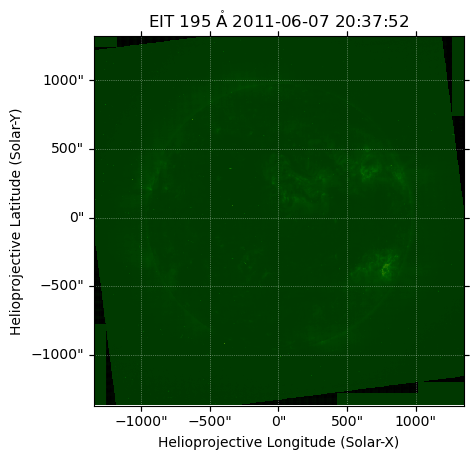

In [ ]:
eit.plot();

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,crln_obs,dsun_obs
 [sunpy.map.mapbase]


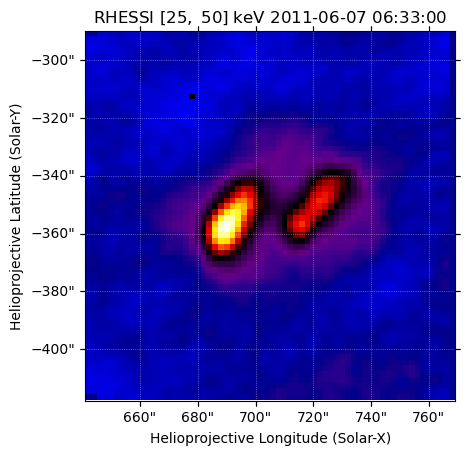

In [ ]:
rhessi.plot();

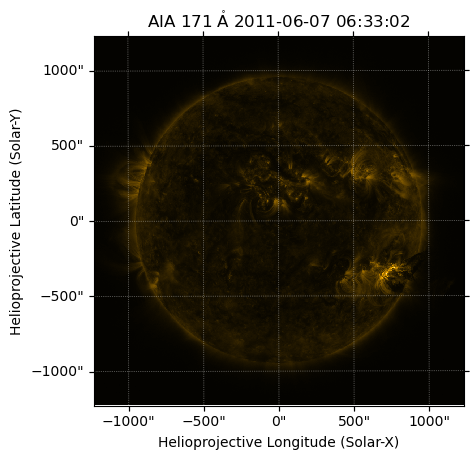

In [ ]:
aia.plot();

Before we plot the image, let's reproject the off-disk AIA coordinates onto
a spherical screen at the same distance as the EIT map, so they can be
overlaid. Next, zoom in around the solar flare so the RHESSI contours are
visible. Also, specify the RHESSI contour levels to be plotted.

In [ ]:
with SphericalScreen(eit.observer_coordinate):
    aia = aia.reproject_to(eit.wcs)

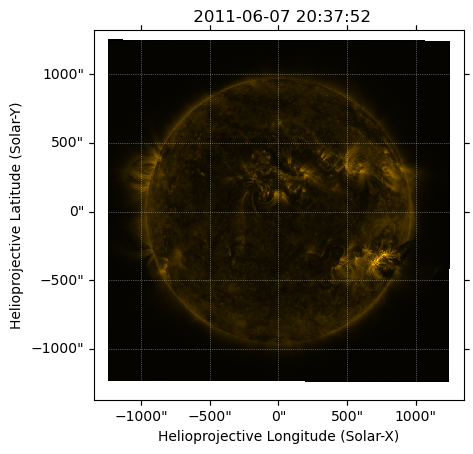

In [ ]:
aia.plot();

In [ ]:
bottom_left = [200, -800] * u.arcsec
top_right = [1000, -200] * u.arcsec
eit_smap = eit.submap(SkyCoord(*bottom_left, frame=eit.coordinate_frame),
                      top_right=SkyCoord(*top_right, frame=eit.coordinate_frame))
aia_smap = aia.submap(SkyCoord(*bottom_left, frame=aia.coordinate_frame),
                      top_right=SkyCoord(*top_right, frame=aia.coordinate_frame))
levels = [5, 10, 20, 30, 40]*u.percent

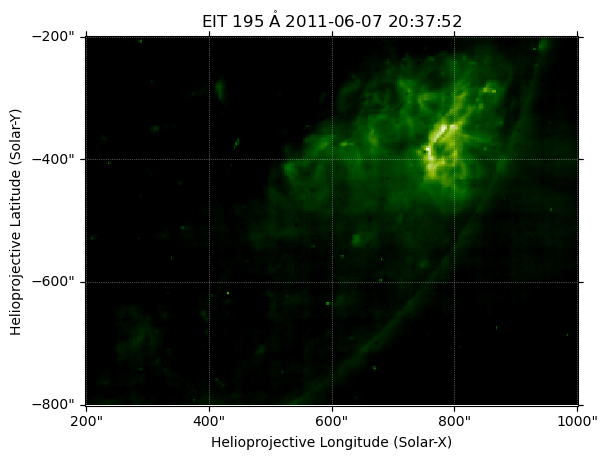

In [ ]:
eit_smap.plot();

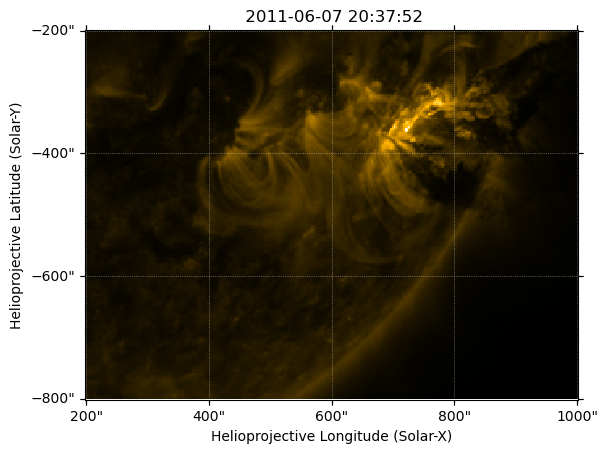

In [ ]:
aia_smap.plot();

When creating the plot, choose which Map will be used to create the WCS Axes
that the other Maps will be plotted with. The EIT map is plotted first,
followed by the AIA map, and lastly the RHESSI contours. Transparency is
changed to 70% on the AIA map by specifying the parameter ``alpha``, and the
image data is autoaligned to the EIT WCS Axes. The parameter ``zorder``
specifies how each plot is layered (0 is plotted first and 1 is layered on
top of 0, and so on).

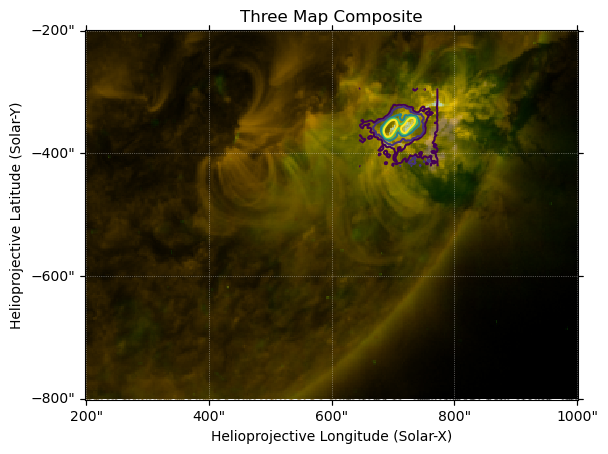

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=eit_smap)
eit_smap.plot(axes=ax, clip_interval=(1, 99.9)*u.percent, zorder=0)
aia_smap.plot(axes=ax, clip_interval=(1, 99.97)*u.percent, alpha=0.7,
              autoalign=True, zorder=1)
rhessi.draw_contours(axes=ax, levels=levels, zorder=2)
ax.set_title("Three Map Composite")

plt.show()